## Looking at predictions of theoretical data
So it doesn't work well if I feed the model data that Rhys has measured. I've never actually looked at trying it with modelled data. I can look at the graphs of predicted n and r vs geound truth, but I don't know what the predicted scatter looks like, so that's the idea of this notebook:
1) load the model
2) pick some radii and indices
3) generate the Mie data
4) feed that to the model to see what it gives.
I'll use the top half of 'load_model_test' and just extend from there. See what we get. 

In [13]:
import pickle
import math
import numpy as np
from scipy.special import jv, yv, jve, yve
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import tensorflow as tf
import csv
import sys
import mie_data_generator_function as mdg

In [14]:
model = load_model("Mie_model_v2de la soul")


In [15]:
# now we have to generate some data to run at the model
#first define the fixed bits of the Mie modelling...
theta_start = 0.03
theta_end = 0.2
th_steps = 100
theta = np.linspace(theta_start, theta_end, th_steps)
#set up the indices
background_index = 1
lambda_ = 632.8646e-9  #HeNe wavelength
# now we have to create some data
#make random ones
foo = np.random.rand(2,6)
indices[:] = 1.3+0.5*foo[0,:]
radii[:] = 6e-6 + (14e-6-6e-6)*foo[1,:]
#indices  = [1.5, 1.6, 1.57, 1.7, 1.62]
#radii = [8.3e-6, 9.7e-6, 7e-6, 9e-6, 11.1e-6]
intensities = np.zeros((len(indices), 100))   # this is where I'm going to put the scattered intensities
for ii in range(0, len(indices)):
    Icalc = mdg.mie_theta(lambda_,theta.reshape(1,th_steps) , radii[ii], background_index, indices[ii] )
    Icalc = np.log10(Icalc)
    intensities[ii,:] = Icalc

#shall we have a look at one?
fig, ax = plt.subplots()
ax.plot(theta, intensities[3,:])
ax.set_title('example of test data')
plt.xlabel('angle')
plt.show()



NameError: name 'indices' is not defined

OK, so now we've made 5 sets of test data, all noise-free and ideal, so we have to send that to the model and see what it gives back. then simulate that data and see what it looks like. 

In [ ]:
y_pred = model.predict(intensities)
index_min = 1.3                 #these are brought in as knowns. Not ideal, but it'll do for now...
index_max = 1.8
radius_min = 6
radius_max = 14
y_unscaled = np.zeros(y_pred.shape)
y_unscaled[:,0] = (y_pred[:,0]*(index_max-index_min))+index_min
y_unscaled[:,1] = (y_pred[:,0]*(radius_max-radius_min))+radius_min
print(y_pred)
print(y_unscaled)

1/1 [==============================] - 0s 31ms/step
[[0.33418816 0.5808304 ]
 [0.42011896 0.47103596]
 [0.59906995 0.9193044 ]
 [0.90426975 0.20913994]
 [0.21183401 0.49834913]
 [0.6077709  0.026097  ]]
[[ 1.46709406  8.67350578]
 [ 1.51005948  9.36095142]
 [ 1.59953499 10.79255962]
 [ 1.7521348  13.23415756]
 [ 1.40591693  7.69467211]
 [ 1.60388541 10.86216736]]


2023-03-29 16:10:26.937775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


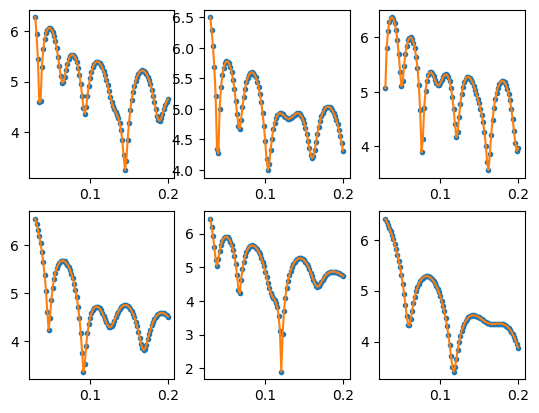

In [ ]:
#Now lets make these asscatter patterns ans see how they compare
pred_intensities = np.zeros((len(indices), 100))   # this is where I'm going to put the scattered intensities
for ii in range(0, len(indices)):
    Icalc = mdg.mie_theta(lambda_,theta.reshape(1,th_steps) , radii[ii], background_index, indices[ii] )
    Icalc = np.log10(Icalc)
    pred_intensities[ii,:] = Icalc

# now we can look at them...
fig, ax2 = plt.subplots(2,3)
xplot = [0,1,2,0,1,2]
yplot = [0,0,0,1,1,1]
for i in range(0, len(radii)):
    ax2[yplot[i], xplot[i]].plot(theta, intensities[i,:],'.' ,theta, pred_intensities[i,:])
    #bx[i].set_title('example of test data')
    #bx[i].set_xlabel('angle')

plt.show()    
